# Data Visualization

As always, let's start by loading some data. We will start with the small `people_csv` so that it's easier to understand what's going on. Make sure to read the dataset that came in the same folder as this notebook, because we have added some people and some columns:

In [60]:
import pandas as pd

In [61]:
people = pd.read_csv('data/people.csv')

In [62]:
people.head()

,name,age,country,sibilings,favourite_color,credit
0,Erika Schumacher,22,DE,2,Red,100
1,Javi López,50,ES,5,Yellow,95
2,Maria Rovira,23,ES,4,Yellow,89
3,Ana Garamond,29,ES,1,Blue,88
4,Shekhar Biswas,44,IN,3,Red,89


## Pandas plotting

### Plotting 1 variable

So far, we've seen Pandas `.hist()` or `.plot()` methods. Those are incredibly convenient, and more than enough when you are visualizing data for yourself, as part of the exploration process:

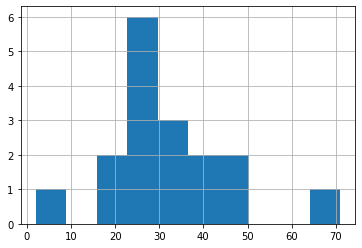

In [63]:
people.age.hist();

Pandas plotting is limited in terms of tweaking/customizing the plot, but you can still change some basic stuff, like the number of bins in a histogram or the figure size:

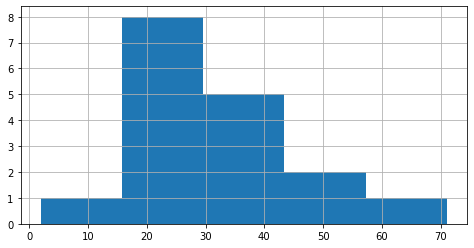

In [64]:
people.age.hist(bins=5, figsize=(8,4));

For simple frequency pots with categorical data, remember:

- You should first group the categories and generate the frequencies with `value_counts()

- You should not use a histogram but a bar plot.

Let's see this in action:

In [65]:
color_freq = people.favourite_color.value_counts()
color_freq

Blue      6
Red       5
Yellow    4
Gray      1
Orange    1
Name: favourite_color, dtype: int64

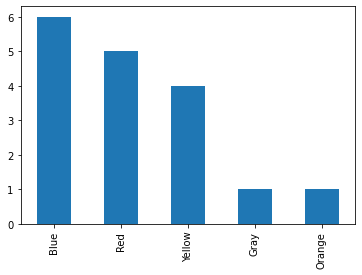

In [66]:
color_freq.plot.bar();

Similarly to the histogram, there are some parameters available. The documentation is always the ultimate source of truth when it comes to understanding which parameters you can tweak and how to do it:

- [These are the docs specifically for `DataFrame.plot.bar()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)
- [Here are the docs for `DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot), with arguments that apply to all types of plots.

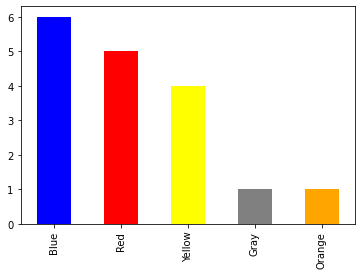

In [67]:
color_freq.plot.bar(color=["blue", "red", "yellow", "gray", "orange"]);

**Exercise**: Make a bar plot for the countries where people are from. Highlight India (IN) in a brighter color.

Tip: if you want to use prettier colors, you'll find some [here](https://matplotlib.org/stable/gallery/color/named_colors.html).

In [68]:
country_freq = people.country.value_counts()
country_freq

DE    5
ES    3
IN    3
UK    3
FR    2
XX    1
Name: country, dtype: int64

<AxesSubplot:>

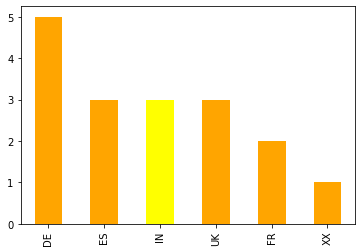

In [69]:
country_freq.plot.bar(color=['orange','orange','yellow','orange','orange','orange'])

### Plotting 2 variables

Whenever you want to see if there is a relationship between two numerical variables, you can compute a linear correlation coefficient or perform more sophisticated statistical tests, but nothing beats a good scatter plot:

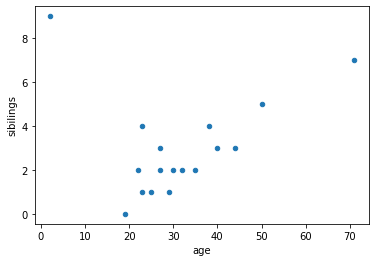

In [70]:
people.plot.scatter(x="age", y="sibilings");

Let's tweak some arguments: 

- The `c` argument allows colors to depend on the values of another (numerical) column.
- The `cmap` argument allows the usage of "color maps" to fill the dots. See all available cmaps [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
- The `s` argument modifies the size of the dots.
- The `figsize` argument defines de size of the whole plot.
- The `sharex` argument allows us to specify that the legend for the colors and the x axis of the scatterplot should not share the axis (it's a bit annoying that this is not the default... welcome to the world of plotting with code!)

Note: Some of these options might only be available if you have one of the latest Pandas versions, since `pandas.plot()` is one of the areas where pandas is growing. You can check your pandas version with `pd.__version__` in the notebook. If your version is substantially older than the one shown in [here](https://pandas.pydata.org/docs/index.html), consider updating pandas by typing on your Terminal `pip install --upgrade pandas`.

In [71]:
pd.__version__

'1.3.4'

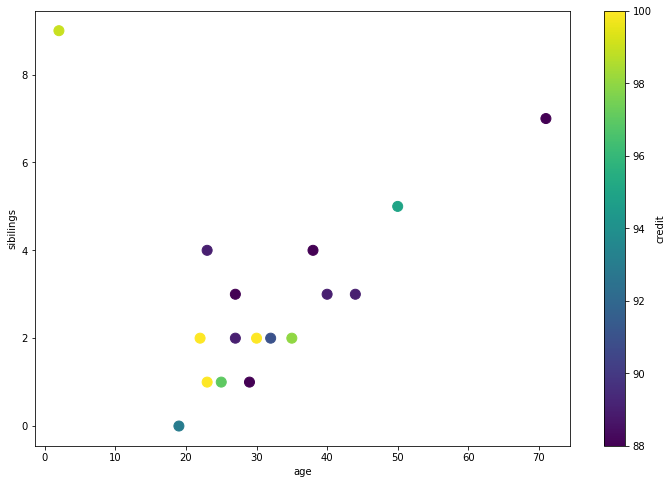

In [72]:
people.plot.scatter(x="age", 
                    y="sibilings", 
                    c="credit",
                    s=100,
                    cmap="viridis",
                    figsize=(12,8),
                    sharex=False
                   );

### Challenges:

Using the `vehicles.csv` dataset, create plots to display the following:

In [73]:
cars = pd.read_csv('data/vehicles.csv')

- How many cars have Automatic or Manual transmission (using the cleaning process from the last challenge).

In [74]:
cars['Clean_transmission'] = cars.apply(lambda row : 'Automatic' if row.Transmission.lower().startswith('auto') else 'Manual',axis=1)

<AxesSubplot:>

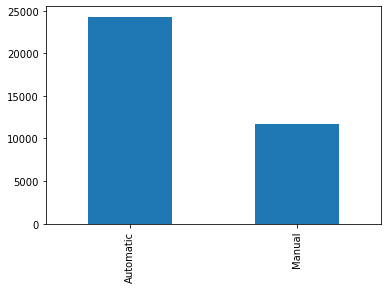

In [75]:
cars.loc[:,'Clean_transmission'].value_counts().plot.bar()

- How many cars have each type of Drivetrain. Highlight "All-Wheel Drive".

<AxesSubplot:>

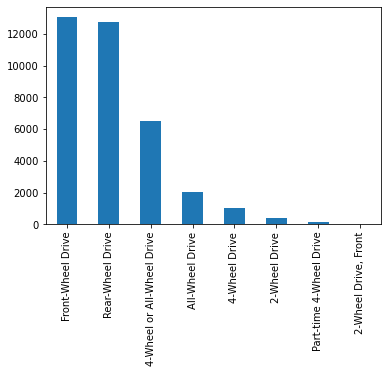

In [76]:
cars.loc[:,'Drivetrain'].value_counts().plot.bar()

- The relationship between fuel consumption (you can use the column `Combined MPG`) and the number of cylinders a car has, using a scatterplot:

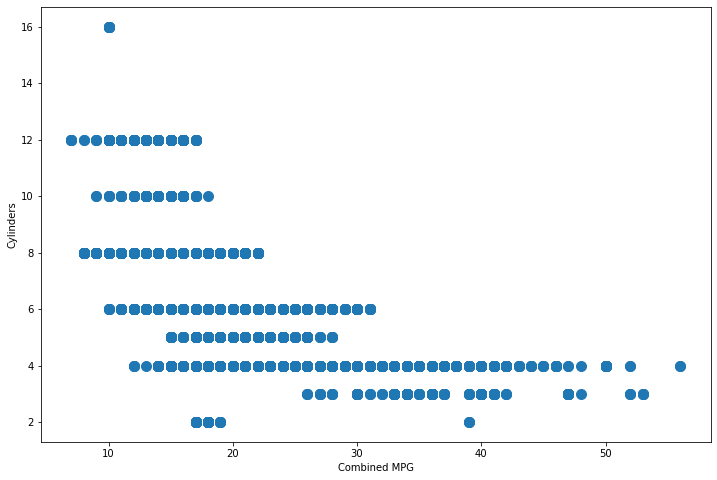

In [77]:
cars.plot.scatter(x="Combined MPG", 
                    y="Cylinders",
                    s=100,
                    cmap="inferno",
                    figsize=(12,8),
                    sharex=False
                   );

- Explore the same relationship, but now use a [boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html):

<AxesSubplot:title={'center':'Combined MPG'}, xlabel='Cylinders'>

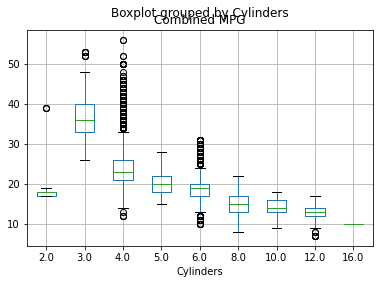

In [78]:
cars.boxplot(column='Combined MPG', by='Cylinders')

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Cylinders', ylabel='Combined MPG'>

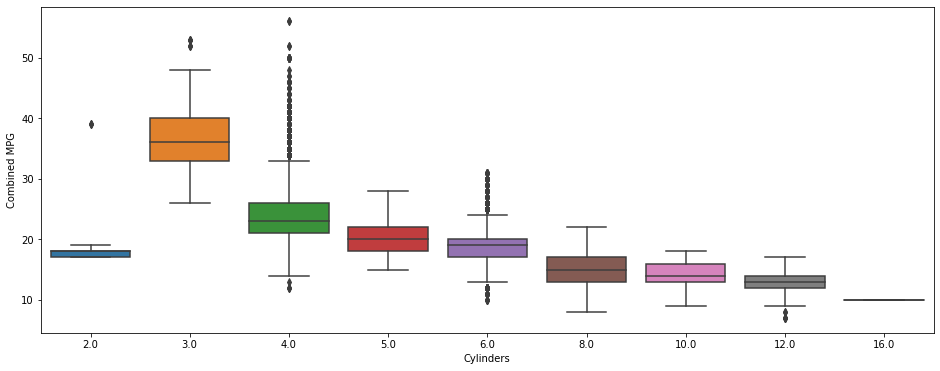

In [80]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='Cylinders', y='Combined MPG', data=cars)

- Create a plot that displays the evolution of the average CO2 emissions by cars over the years.

<AxesSubplot:xlabel='Year'>

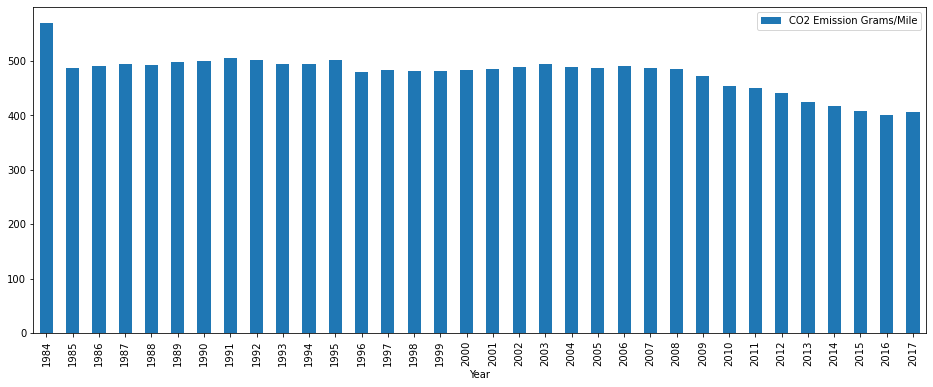

In [81]:
cars.groupby('Year').agg({'CO2 Emission Grams/Mile': 'mean'}).sort_values(by='Year').plot.bar(figsize=(16, 6))

- Create a plot that clearly displays the evolution of the different types of fuel over the decades (only for the most common fuel types: "Diesel", "Gasoline or E85", "Premium", "Regular").

Note: you might have to transform the data shape before actually plotting. Use the column you created in the `intro-to-pandas` notebook with bins for each decade, and take a look at the [pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) function.

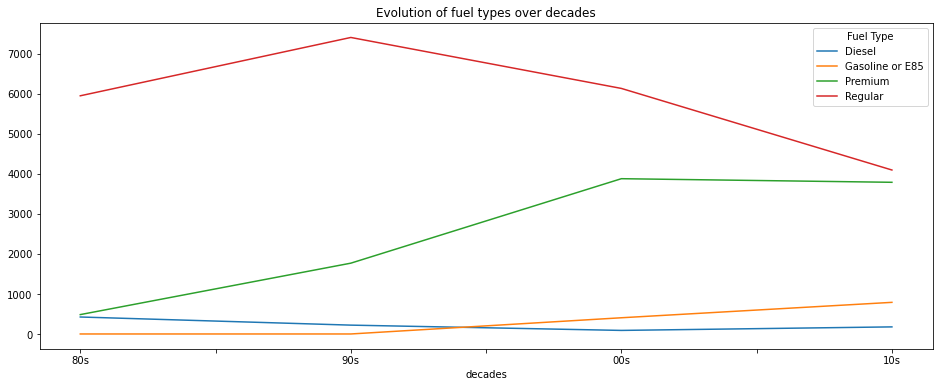

In [123]:
cars['decades'] = pd.cut(cars['Year'],[1979,1989,1999,2009,2019],labels=['80s','90s','00s','10s'])
fuel_type_decades = cars.loc[cars['Fuel Type'].str.match("^Diesel$|^Gasoline or E85$|^Premium$|^Regular$")].groupby(['decades','Fuel Type']).agg(Count=('Fuel Type', 'count'))
fuel_type_decades_pivot = pd.pivot_table(fuel_type_decades,values='Count',index='decades',columns='Fuel Type')
fuel_type_decades_pivot.plot.line(title='Evolution of fuel types over decades',figsize=(16, 6));


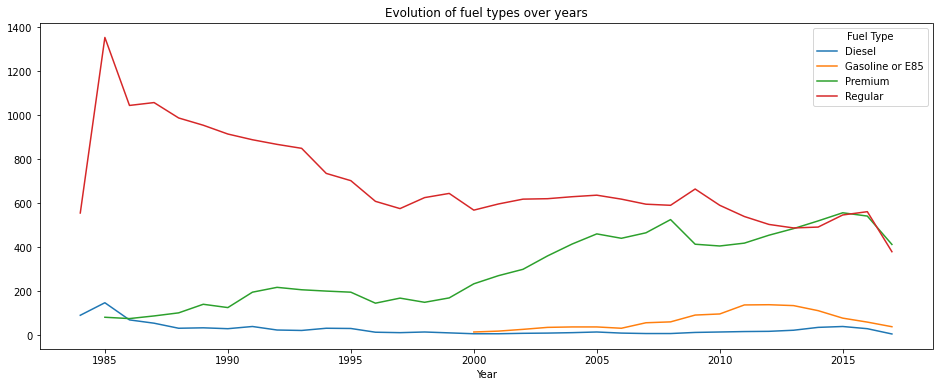

In [125]:
fuel_type_decades = cars.loc[cars['Fuel Type'].str.match("^Diesel$|^Gasoline or E85$|^Premium$|^Regular$")].groupby(['Year','Fuel Type']).agg(Count=('Fuel Type', 'count'))
fuel_type_decades_pivot = pd.pivot_table(fuel_type_decades,values='Count',index='Year',columns='Fuel Type')
fuel_type_decades_pivot.plot.line(title='Evolution of fuel types over years',figsize=(16, 6));